# importing necessary libraries

In [50]:
#data manipulation analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#nmf
from sklearn.decomposition import NMF 

#clustering librarires
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

## loading df

In [2]:
df =pd.read_csv('spotify.xls' , index_col= 0 )
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [3]:
df.shape

(1000, 5000)

In [4]:
x = df.values
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

## NMF - non - negative matrix factorisation 

In [5]:
nmf = NMF(n_components= 100, max_iter= 1000 , random_state= 3)# n_comp = generes in data (features) ,max iter = number of iteration allowed (no of rows)
    

In [6]:
nmf.fit(x)


C:\Users\Device Computer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\Device Computer\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


NMF(max_iter=1000, n_components=100, random_state=3)

In [7]:
user_matrix = nmf.transform(x)
song_matrix = nmf.components_.T

In [8]:
user_matrix 

array([[1.59597279, 1.63144383, 0.        , ..., 0.        , 0.        ,
        0.08842005],
       [0.        , 1.37058116, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25150672, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.86093206, ..., 0.        , 2.91063979,
        0.        ],
       [0.89111106, 0.55775866, 5.28815626, ..., 1.14447002, 0.        ,
        0.        ],
       [0.11437224, 0.3810454 , 1.17187612, ..., 0.        , 0.        ,
        0.        ]])

In [9]:
song_matrix

array([[0.09154476, 0.02084876, 0.06170426, ..., 0.20525732, 0.02089963,
        0.42266527],
       [0.29410861, 0.        , 0.01635891, ..., 0.00535885, 0.25048781,
        0.28966942],
       [0.00182988, 0.16233797, 0.00882299, ..., 0.        , 0.0265591 ,
        0.15587654],
       ...,
       [0.37753494, 0.4043987 , 0.38341127, ..., 0.        , 0.49498818,
        0.        ],
       [0.        , 0.15106911, 0.        , ..., 0.34925875, 0.46747326,
        0.36724356],
       [0.09094906, 0.15572379, 0.        , ..., 0.30544496, 0.21424152,
        0.38353537]])

In [10]:
user_matrix.shape

(1000, 100)

In [11]:
song_matrix.shape

(5000, 100)

# steps for building recommendation  system  - type 1 (for local libraries or small data sets)
1.  consider recomneding songs   to the first user (row location 0)
2. find the euclidiean distance between the 1st user and the remaining 999 user
3. find out top 10 songs heard by nearest 5 user 
4. recommend these 10 songs to the first users 

calculating the distance between 2 users 

In [12]:
def col_dist(u1 , u2 ):
    return pow(sum(pow(u1[x]-u2[x], 2)for x in range(len(u1)) ), 0.5)

In [13]:
col_dist(user_matrix[0], user_matrix[1])

17.066386601826405

In [14]:
def distance_from_remaining_user(buser , user_matrix):
    dist = []
    for i in range (len(user_matrix)):
        if buser != i :
            dist.append(col_dist(user_matrix[buser],user_matrix[i]))
    return dist

In [15]:
dist_user1 = distance_from_remaining_user(0 , user_matrix)

In [16]:
dist_user1

[17.066386601826405,
 15.356075620840773,
 15.860626597198227,
 15.085478037649489,
 13.844410783740862,
 14.938304994809554,
 13.250608547710643,
 16.84837011318289,
 15.14656275921705,
 15.085160715955208,
 15.426113947412805,
 15.162198319848336,
 8.915369316354946,
 16.06701968592764,
 14.192876182598646,
 12.16310373027404,
 15.34202355923998,
 15.107063797989863,
 12.398262626542504,
 13.014577302532768,
 15.558351008865385,
 15.60633353073488,
 16.15773243607876,
 16.372436321651236,
 15.742562231413245,
 15.287379336353345,
 14.67893233200893,
 13.958180490073039,
 16.353768628808194,
 16.16795046379697,
 15.59280586939767,
 15.300255567404227,
 14.813458276118547,
 14.67227907559743,
 14.966327526945037,
 14.957592291537836,
 15.289917564526545,
 15.751052100912702,
 15.536270215621187,
 13.989176492492854,
 15.584294899734129,
 14.422344103032863,
 14.02991455503989,
 14.4986132438705,
 15.124960994335828,
 14.030779564396534,
 12.413550520410288,
 14.918957038420903,
 13.491

In [17]:
len(dist_user1)

999

finding  5 nearest user 

In [18]:
nearest_users = np.argsort(dist_user1)[:5]

In [19]:
for i in range (len(nearest_users)):
    nearest_users[i]+=1
    
nearest_users 

array([ 13, 614, 666, 914, 395], dtype=int64)

finding the most heard songs by these users

In [20]:
for i in nearest_users:
    print('songs heard by user' , i , 'are :' )
    temp = df.iloc[i+1]
    print (temp[temp.values != 0 ].index)

songs heard by user 13 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4709)
songs heard by user 614 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_11', 'song_12',
       ...
       'song_4990', 'song_4991', 'song_4992', 'song_4993', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4663)
songs heard by user 666 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', lengt

 picking out top 10 songs from above list of songs 

In [21]:
def topN_songs(nearest_users,df,N):
    temp = df.iloc[nearest_users]
    dict1= temp.max().to_dict()
    #print(dict1)
    # converting every key value pai into a tuple and swaping them for sorting purpose ,end result is a list of
    # song and number of times heard tuple 
    sorted_dict = sorted(dict1.items(), key= lambda keyvalue:(keyvalue[1] , keyvalue[0]),reverse= True)[:N]
    #print(sorted_dict)
    return [x[0] for x in sorted_dict]
    #return 0  

In [22]:
topN_songs(nearest_users , df, 5 )

['song_998', 'song_990', 'song_99', 'song_988', 'song_987']

##  type 2 recomendation system for larger data set 
- k means clustering 

In [24]:
WCSS = {}
for k in range (1,50):
    kmeans = KMeans(n_clusters = k , max_iter = 1000 ).fit(song_matrix)
    WCSS[k] = kmeans.inertia_

In [25]:
WCSS

{1: 14072.226800880684,
 2: 13901.130812763462,
 3: 13773.651000318256,
 4: 13673.742723239244,
 5: 13593.1529099644,
 6: 13522.0241809117,
 7: 13455.380372400374,
 8: 13404.92956884011,
 9: 13349.624929276277,
 10: 13303.588754256498,
 11: 13266.74252940475,
 12: 13239.194964156533,
 13: 13206.312216814964,
 14: 13168.264258699724,
 15: 13155.89997456639,
 16: 13127.86598435731,
 17: 13095.742838818707,
 18: 13076.165988127981,
 19: 13060.662171417505,
 20: 13029.039013477204,
 21: 13016.457474550563,
 22: 12996.85741441389,
 23: 12988.906586278106,
 24: 12963.807059033938,
 25: 12954.27855321971,
 26: 12933.02481999208,
 27: 12911.10657952834,
 28: 12910.296538348883,
 29: 12888.537257371056,
 30: 12878.20702542392,
 31: 12862.66901580967,
 32: 12855.268077596262,
 33: 12831.898858954357,
 34: 12828.514339753216,
 35: 12820.380975728365,
 36: 12808.10505782646,
 37: 12792.049137143358,
 38: 12769.972986261831,
 39: 12762.596946626058,
 40: 12754.258483081256,
 41: 12747.002879354357,

Text(0, 0.5, 'WCSS')

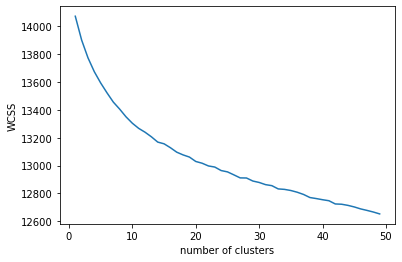

In [26]:
plt.plot(WCSS.keys(), WCSS.values())
plt.xlabel('number of clusters')
plt.ylabel('WCSS')

In [62]:
def songs_in_cluster(N_clusters , df , song_matrix , song_name , n_recommedations):
    kmeans = KMeans(n_clusters = N_clusters, max_iter = 1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)
    #print (index_in_song)
    song_vector = song_matrix[index_in_song] #song_vecotr = genre of song 
    #print(song_vector)
    all_songs_in_cluster = kmeans.predict(song_matrix)
    #print(len(all_songs_in_cluster))
    
    #finding songs which belongs to same cluster as of songs passesd in song name
    songs_in_selected_clusters = [x for x in range(len(all_songs_in_cluster)) 
                                  if all_songs_in_cluster[x]==kmeans.predict([song_vector])]
    
    #print(len(songs_in_selected_cluster))
    song_cluster = song_matrix[songs_in_selected_clusters]
    #print(song_cluster)
    neighbors = NearestNeighbors(n_neighbors = n_recommedations)
    neighbors.fit(song_cluster)
    recommended_songs = neighbors.kneighbors([song_matrixg[index_in_song]])
    #print (recommended_songs)
    
    songs = df.columns
    return [songs[x] for x in recommended_songs[1][0]]

In [63]:
songs_in_cluster(15 , df , song_matrix , 'song_5', 5)

NameError: name 'song_matrixg' is not defined